In [0]:
import pandas as pd
from google.colab import files

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import io
path = "/content/drive/My Drive/Colab Notebooks/kaggle comp/Data.csv"
data = pd.read_csv(path)
#data = pd.read_csv("Data.csv")
#data = pd.read_csv(io.StringIO(uploaded['Data.csv'].decode('utf-8')))

data.head()

,Unnamed: 0,answer,answerTime,answerType,asin,question,questionType,unixTime
0,0,Yes this fits both the nook color and the same...,"Dec 27, 2013",Y,0594033926,Is this cover the one that fits the old nook c...,yes/no,1.388131e+09
1,1,No. The nook color or color tablet,"Jan 5, 2015",N,0594033926,Does it fit Nook GlowLight?,yes/no,1.420445e+09
2,2,I don't think so. The nook color is 5 x 8 so n...,2 days ago,NaN,0594033926,Would it fit Nook 1st Edition? 4.9in x 7.7in ?,open-ended,NaN
3,3,yes,17 days ago,Y,0594033926,Will this fit a Nook Color that's 5 x 8?,yes/no,NaN
4,4,"No, the tab is smaller than the 'color'","Feb 10, 2015",N,0594033926,will this fit the Samsung Galaxy Tab 4 Nook 10.1,yes/no,1.423555e+09


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314263 entries, 0 to 314262
Data columns (total 8 columns):
Unnamed: 0      314263 non-null int64
answer          314231 non-null object
answerTime      314263 non-null object
answerType      165598 non-null object
asin            314263 non-null object
question        314263 non-null object
questionType    314263 non-null object
unixTime        304873 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 19.2+ MB
None


## Misising values

In [6]:
#messing values
print(data.isnull().sum())
#data.drop(columns =["answer"], inplace = True) 

Unnamed: 0           0
answer              32
answerTime           0
answerType      148665
asin                 0
question             0
questionType         0
unixTime          9390
dtype: int64


In [7]:
# unique values and thier counts : 'answerType' column
print(data.answerType.unique())
print(data.answerType.value_counts())
#78062+63726+23810+148665

['Y' 'N' nan '?']
?    78062
Y    63726
N    23810
Name: answerType, dtype: int64


In [8]:
print(data.questionType.value_counts())

yes/no        165598
open-ended    148665
Name: questionType, dtype: int64


In [9]:
#Drop columns
data.drop(['Unnamed: 0','asin','unixTime'], axis=1, inplace= True)
data.head()

,answer,answerTime,answerType,question,questionType
0,Yes this fits both the nook color and the same...,"Dec 27, 2013",Y,Is this cover the one that fits the old nook c...,yes/no
1,No. The nook color or color tablet,"Jan 5, 2015",N,Does it fit Nook GlowLight?,yes/no
2,I don't think so. The nook color is 5 x 8 so n...,2 days ago,NaN,Would it fit Nook 1st Edition? 4.9in x 7.7in ?,open-ended
3,yes,17 days ago,Y,Will this fit a Nook Color that's 5 x 8?,yes/no
4,"No, the tab is smaller than the 'color'","Feb 10, 2015",N,will this fit the Samsung Galaxy Tab 4 Nook 10.1,yes/no


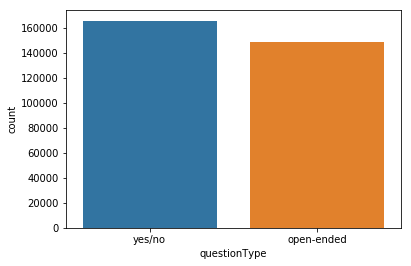

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="questionType" , data = data)

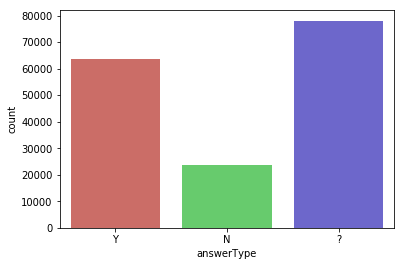

In [11]:
#problem ? type of category around 80000 , nan has 148665 
sns.countplot(x="answerType" , data = data, palette = "hls")  

### Sentimate analysis worldcloud

In [0]:
# answerType column
t= []
for i in range(len(data['answer'])):
    t.append(data.iloc[i,0])
    #print(i)
answer = str(t)

In [45]:
answer[1:100]

"'Yes this fits both the nook color and the same-shaped nook tablet', 'No. The nook color or color t"

In [0]:
with open("answer.txt","w",encoding='utf8') as output:
    output.write(str(answer))

In [28]:
# Cleaning our text , convert into lower text
import re
answer = re.sub("[^A-Za-z0-9\n. " "]+"," ",answer)
answer = answer.lower()
print(answer[1:500]) , print('\n',type(answer))

yes this fits both the nook color and the same shaped nook tablet   no. the nook color or color tablet   i don t think so. the nook color is 5 x 8 so not sure anything smaller would stay locked in  but would be close.   yes   no  the tab is smaller than the  color   no  there is not a flip stand. it has a pocket in the front flap. it is a very nice cover.   hi  no it doesn t   it should. they are the same size and the charging port is in the same place.   yes   no  it is more like a normal book

 <class 'str'>


(None, None)

### Do lemmatization : meaning of word important for our analysis (question & answer appl)

In [15]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer  

sentence = nltk.sent_tokenize(answer)
lemmatizer = WordNetLemmatizer()

In [36]:
type(sentence)
sentence[1:5]
len(sentence)

624935

In [0]:
#lemmatizer 
for i in range(len(sentence)):
    words = nltk.word_tokenize(sentence[i])  #converting into word
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english')) ]
    sentence[i] = ' '.join(words)

In [43]:
sentence[1:10]

['nook color color tablet think .',
 'nook color 5 x 8 sure anything smaller would stay locked would close .',
 'yes tab smaller color flip stand .',
 'pocket front flap .',
 'nice cover .',
 'hi .',
 'size charging port place .',
 'yes like normal book would .',
 'flop open never wen issue .']

In [0]:
# Joinining all the answer into single 
new_answer = ' '.join(sentence)

In [40]:
new_answer[1:500]

'es fit nook color shaped nook tablet . nook color color tablet think . nook color 5 x 8 sure anything smaller would stay locked would close . yes tab smaller color flip stand . pocket front flap . nice cover . hi . size charging port place . yes like normal book would . flop open never wen issue . nook clip secure safe holder inside small convenient . best cover ever nook trim functional magnet elastic needed . 18 inch tv . yes need sound bar mount . 200mm x200mm . yes fully extended wall tv su'

In [0]:
#nlWordNetLemmatizerownload('stopwords')
#with open("stopwords.txt","r") as sw:
#    stopwords = sw.read()
#stopwords = stopwords.words('english')
#answer = answer.split(" ")
#new_answer = [w for w in answer if not w in stopwords] 
# Joinining all the answer into single 
#new_answer = " ".join(new_answer)
# remaining to here also we lemitization/stemming 

In [0]:
with open("clean_answer.txt","w",encoding='utf8') as output:
    output.write(str(answer))

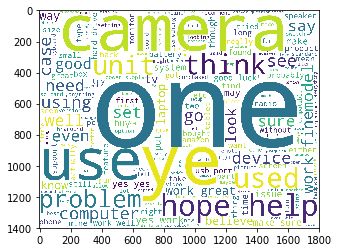

In [41]:
wordcloud_ip = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(new_answer)
plt.imshow(wordcloud_ip)

### Inferance Those word in world cloud find in answer.txt file we get actual problem of that device
### for eg : camera  
- the device does not have a camera
- The Nook isn't compatable with Skype, as it lacks both rear and front facing cameras
- the operating system would need to have an appropriate driver to run the camera

In [0]:
for 'one' word 

=>There is a one year limited warranty that comes with the device, right out of the box. Beyond that, you can purchase extended warranties and more comprehensive protection plans.
=>The Nook HD uses a proprietary cable. It comes with a cable and a USB charger but you can plug it into any USB charger. You don't have to use the one that comes with it. You do have to use the cable that comes with it. Barry
=>Originally from factory is shipped with Android 4 but is locked. Is not pure Android. But you can easy install CyanogenMod Android 4.3 with all the benefits of 100% unlocked android. CyanogenMod is one of the best roms for smartphones and tablets. This nook runs very smooth you can play videos with 1080p resolution. Its grate.
=>No, only the one cord for charging in the wall or on a computer. There is no case included. You have to purchase that separately. Amazon has better deals on cases than B&N.


for word 'problem'
=>It took less than 5 minutes to root (and that was mostly "burning" the bootable image to the SD card). There are NO disadvantages. If you ever have a problem, it\'s quite easy to return the Nook Color to factory conditions (and therefor in-warranty status). A rooted Nook Color is just as fast as any other tablet running an 800 Mhz ARM processor, faster if you overclock it
=>don't get it it sucks!!! It blacked out on me after about 30 days after I had all my information in there!! and it was from a second party! this is the only bad thing that I have had a problem with at Amazon!! I sent it back after numerous attempts to get a confirmation number
=>The only little problem I found when reading for long time, is that because of the outside plastic it gets stuck on the hand and I have to change the position of reading every 15-20 minuts
=>I suppose once I get the cover I asked, I could handle in another way and the problem won't come back. One very bad experience!! I purchased the cover on Barnes&Noble and because is going to Europe you cannot track it
=>I don't think Google TV is the problem because it seemed to work well on the Sony device, and I never had a problem access Netflix on my Roku

for word 'use'
=>The important thing to remember is to use a DVI-D cable on the correct port of your video card. I have a GTX780 and there are two DVI ports so I had to research a bit.
=>I would suggest setting the font size to 125 percent or 150 percent, otherwise there might be some readability issues. This does not work as well with Windows 7, but you can try it. I use mine for video editing, coding, general web-surfing, gaming, etc.
